<a href="https://colab.research.google.com/github/VAISHNAVI02210/Codsoft_Intership/blob/main/Iris_flower_task_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Codesoft Internship**

TASK - 2 : Iris flower  classification

Author : vaishnavi kale

Domain : Data Science

Batch : december 25

**AIM**

To design and implement a machine learning model that utilizes the Iris flower dataset to classify flowers into one of three species—Setosa, Versicolor, or Virginica—based on their sepal and petal dimensions. This project aims to apply data preprocessing, exploratory data analysis, and supervised learning techniques to train a classification model, evaluate its performance, and provide insights into the factors influencing species differentiation. The objective is to create a reliable and interpretable model for accurate species classification.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [ ]:
data =pd.read_csv('/kaggle/input/iris-flower-dataset/IRIS.csv')

In [ ]:

data.head()


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:

print(data.info())
print(data.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB
None
       sepal_length  sepal_width  petal_length  petal_width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.054000      3.758667     1.198667
std        0.828066     0.433594      1.764420     0.763161
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.350000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.400000      6.900000     2.50000

In [ ]:
data.tail()

,sepal_length,sepal_width,petal_length,petal_width,species
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2
149,5.9,3.0,5.1,1.8,2


In [ ]:
# Check for null values
print("\nMissing Values:\n", data.isnull().sum())

In [ ]:
data.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [ ]:
# Encode target labels if they are categorical
if data.iloc[:, -1].dtype == 'object':
    encoder = LabelEncoder()
    data.iloc[:, -1] = encoder.fit_transform(data.iloc[:, -1])
    print("\nLabel Encoding Completed:")
    print(encoder.classes_)


Label Encoding Completed:
['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']


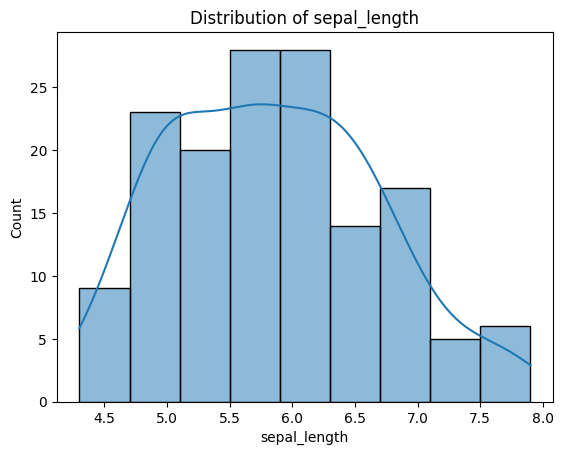

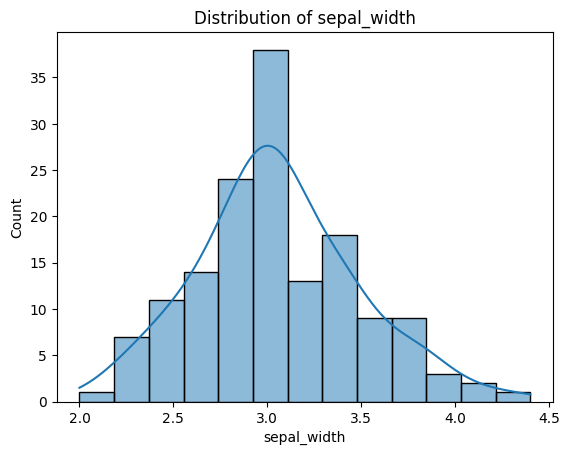

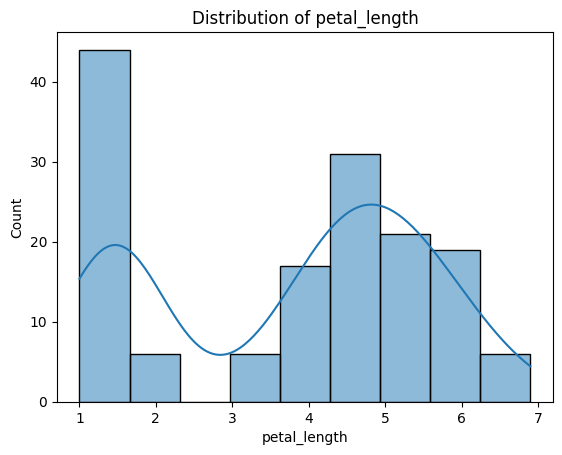

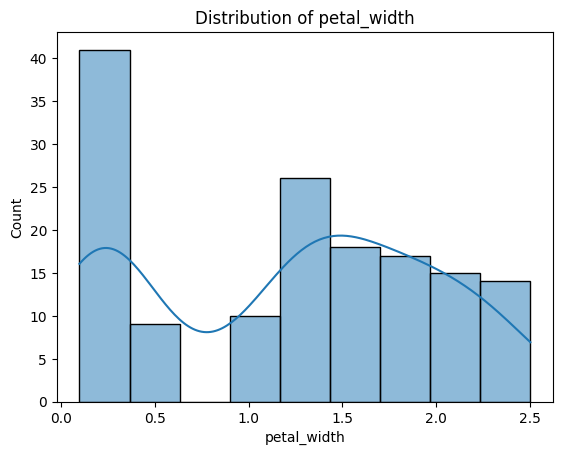

In [ ]:
for column in data.select_dtypes(include=['float64', 'int64']).columns:
    sns.histplot(data[column], kde=True)
    plt.title(f'Distribution of {column}')
    plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

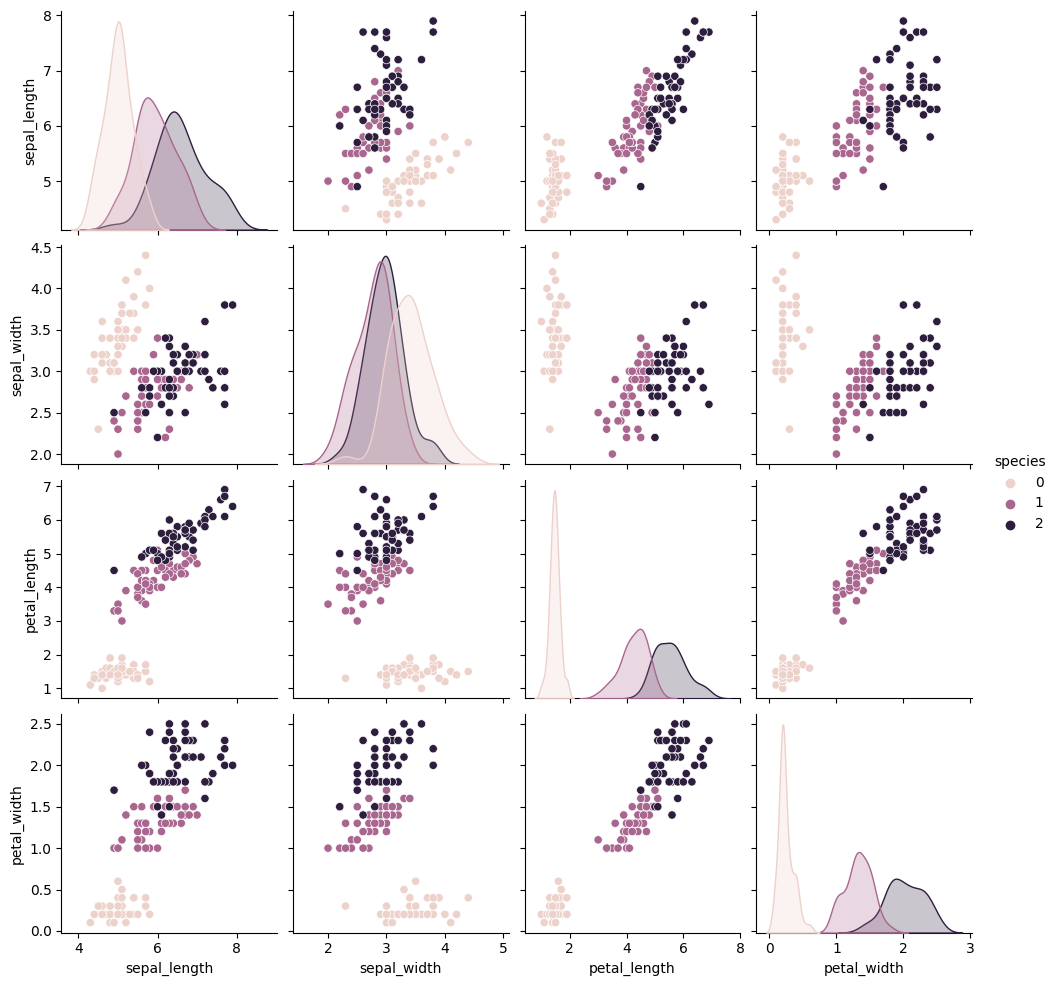

In [ ]:
# Pair plot to visualize feature relationships
sns.pairplot(data, hue=data.columns[-1])
plt.show()

In [ ]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)


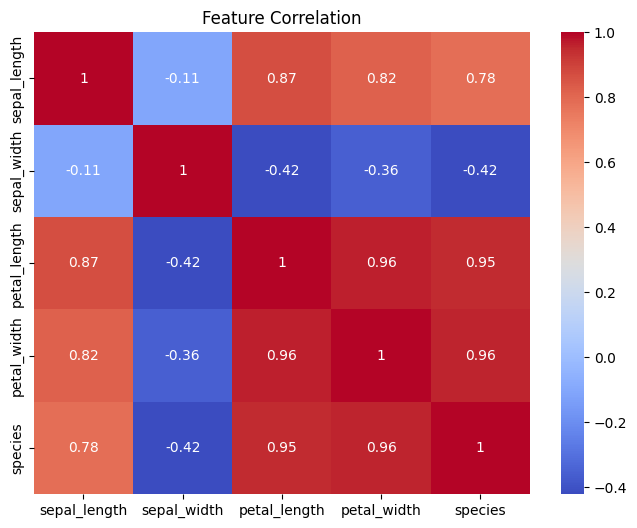

In [ ]:
# Correlation heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(data.corr(), annot=True, cmap="coolwarm")
plt.title("Feature Correlation")
plt.show()

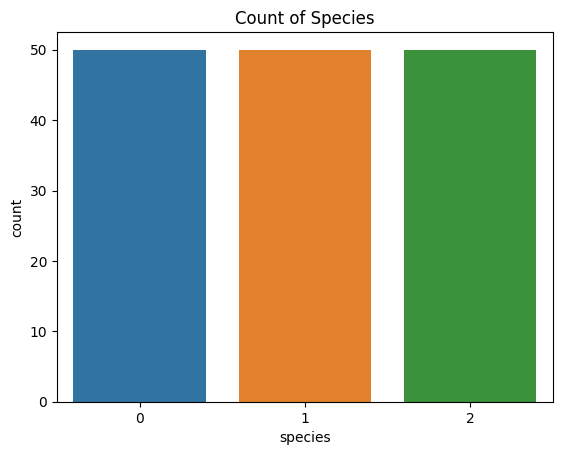

In [ ]:
sns.countplot(data=data, x='species')
plt.title('Count of Species')
plt.show()

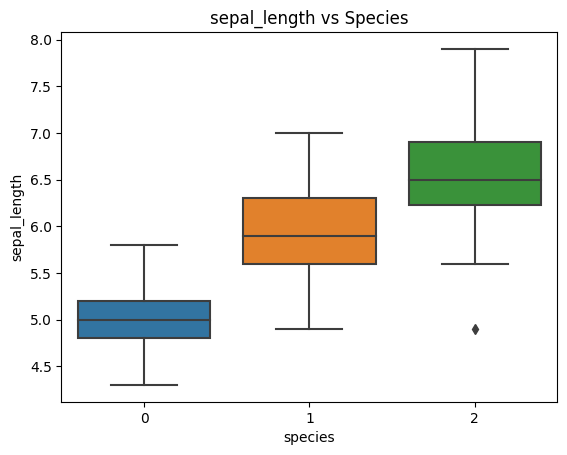

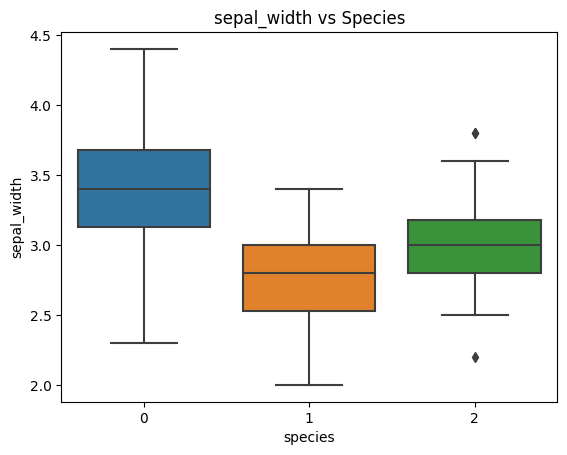

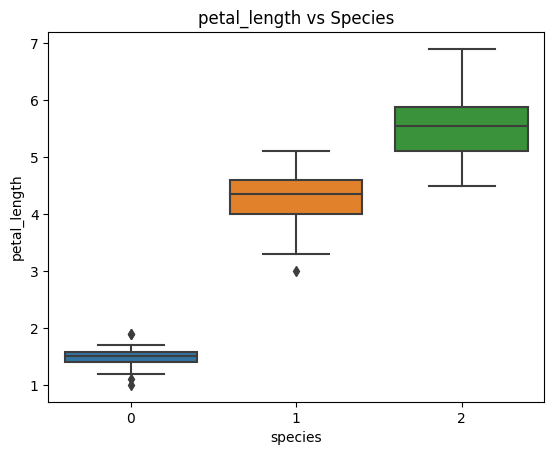

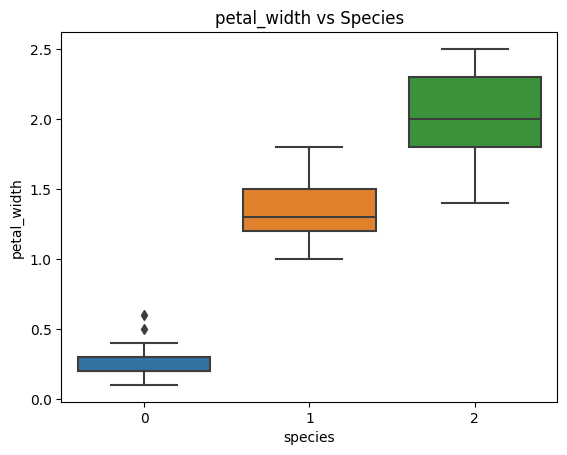

In [ ]:

for column in data.select_dtypes(include=['float64', 'int64']).columns:
    sns.boxplot(data=data, x='species', y=column)
    plt.title(f'{column} vs Species')
    plt.show()

In [ ]:
#Split Data into Train and Test Sets
X = data.iloc[:, :-1]  # Features
y = data.iloc[:, -1]   # Target

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f"Training Set Size: {X_train.shape}, Testing Set Size: {X_test.shape}")

Training Set Size: (120, 4), Testing Set Size: (30, 4)


In [ ]:
#Train a Classifier
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)


ValueError: Unknown label type: 'unknown'

In [ ]:
# Ensure labels are numeric
if y.dtype == 'object':
    encoder = LabelEncoder()
    y = encoder.fit_transform(y)
    print("\nLabel Encoding Completed:", encoder.classes_)

# Check for mismatched sizes or missing values
print("X shape:", X.shape)
print("y shape:", y.shape)
print("Unique labels in y:", np.unique(y))



Label Encoding Completed: [0 1 2]
X shape: (150, 4)
y shape: (150,)
Unique labels in y: [0 1 2]


In [ ]:
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)


X_train shape: (120, 4)
y_train shape: (120,)


In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data['species'] = le.fit_transform(data['species'])

In [ ]:
X = data.drop(columns=['species'])
y = data['species']


In [ ]:

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

model = LogisticRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print('Accuracy:', accuracy_score(y_test, y_pred))
print('Classification Report:\n', classification_report(y_test, y_pred))
print('Confusion Matrix:\n', confusion_matrix(y_test, y_pred))

Accuracy: 1.0
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

Confusion Matrix:
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


In [ ]:
print("Model trained successfully!")


Model trained successfully!


In [ ]:
from sklearn.svm import SVC
svc = SVC(kernel='linear')
svc.fit(X_train, y_train)

y_pred_svc = svc.predict(X_test)
print('Accuracy (SVM):', accuracy_score(y_test, y_pred_svc))

Accuracy (SVM): 0.9666666666666667


In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)
print('Accuracy (Random Forest):', accuracy_score(y_test, y_pred_rf))

Accuracy (Random Forest): 1.0


In [ ]:
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



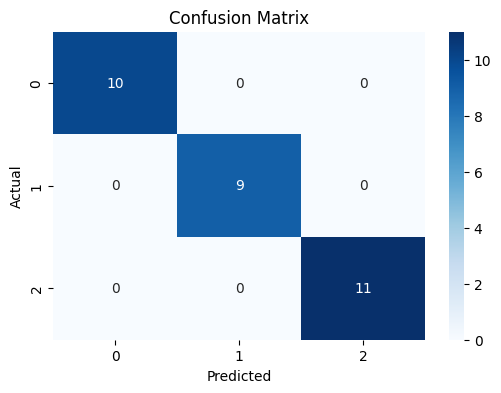

In [ ]:
# Confusion Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


In [ ]:
# Replace 'new_data' with the actual new sample(s)
new_data = [[5.1, 3.5, 1.4, 0.2]]  # Example input
prediction = model.predict(new_data)
print(f"Prediction for {new_data}: {prediction}")

Prediction for [[5.1, 3.5, 1.4, 0.2]]: [1]


In [ ]:
import joblib

# Save the model
joblib.dump(model, "iris_rf_model.pkl")
print("Model saved successfully as iris_rf_model.pkl")


Model saved successfully as iris_rf_model.pkl


In [ ]:
# Load the model
loaded_model = joblib.load("iris_rf_model.pkl")
